In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
import pandas as pd
import random as rd

class Regressor:
    e = 2.7182818284
    def __init__(self , x,y,lr = 0.03,epsilon =0.0000001 ):
        self.lr = lr
        self.epsilon = epsilon
        if isinstance(x, np.ndarray):
            self.x = x
            self.y = y
        else:
            self.x = np.array(x)
            self.y = np.array(y)
        self.n_examples = self.x.shape[0]
        self.weights = np.random.rand(self.x.shape[1])
        self.b = 0
        self.losses = []
        
            
    def plot(self):
        plt.scatter(self.x,self.y)
        plt.show()
    def sigmoid(self,x):
        return (1/(1+np.exp(-x)))
    def loss(self,y,ypred):
        
       
        return -sum(y*log(ypred+self.epsilon) + (1-y)*log(1-ypred+self.epsilon) )/self.n_examples
    def forward(self):
      
        return self.sigmoid(np.dot(self.x,self.weights)+self.b)
    def regress(self,epochs = 10):
        
        for i in range(epochs):
            ypred = self.forward()
            self.weights -= self.lr *( np.dot(self.x.T, ypred-self.y)/self.x.shape[0])
            self.b -= (self.lr*np.sum(ypred - self.y)/self.x.shape[0])
            self.losses.append(self.loss(self.y,ypred))
            
    def predict(self,x):
        return self.sigmoid(np.dot(x,self.weights)+self.b)
    def plot_loss(self):
        plt.plot(np.arange(0,len(self.losses)),self.losses)
        plt.show()

        
        

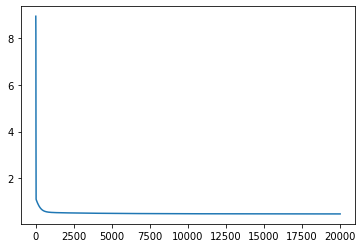

0.7833894500561167
Wall time: 1.99 s


In [6]:
%%time
df = pd.read_csv('')

x_train = df[["Pclass","Sex","Age","Fare"]].to_numpy()
y_train = df["Survived"].to_numpy()
logr = Regressor(x_train,y_train,lr=0.003)
logr.regress(epochs=20000)
logr.plot_loss()
print(np.mean(np.array([0 if x<0.5 else 1 for x in logr.predict(x_train)]) ==y_train))
            
    

In [3]:
from sklearn.linear_model import SGDClassifier

In [23]:
%%time
logreg = SGDClassifier(learning_rate="constant",eta0=0.005)
logreg.fit(x_train,y_train)
print(np.mean(np.array([0 if x<0.5 else 1 for x in logreg.predict(x_train)]) ==y_train))


0.7149270482603816
Wall time: 1.99 ms
